In [1]:
from class_magnesium_not_drop_na import *

In [2]:
model = RandomForestClassifier(n_estimators=200, max_depth = 35, min_samples_leaf = 1, n_jobs=-1, criterion='gini')

### Train N_5

In [3]:
filename = "set_minresol_N_5_1000.csv"
fold = 'input files/'

In [4]:
model_N_5 = Magnesium(filename, fold=fold,colours = ['#f6c35b', '#929292'],
                 model = model, with_groups = False)
data_N_5 = model_N_5.compute(n_splits = 15, test_size = 0.3, plots = True, show_plots = False, reduce_features = False,
                             balanced = True)

Before:  (22364, 361)
After:  (9282, 361)

Number of sites:  1393
Portion of sites:  0.500179533214
Average score:  0.65223219629
Last score:  0.660323159785


### Train M_5

In [5]:
filename = "set_minresol_M_5_1000.csv"
fold = 'input files/'

In [6]:
model_M_5 = Magnesium(filename, fold=fold,colours = ['#f6c35b', '#929292'],
                 model = model, with_groups = False)
data_M_5 = model_M_5.compute(n_splits = 15, test_size = 0.3, plots = True, show_plots = False, reduce_features = False, 
                             balanced = True)

Before:  (67092, 364)
After:  (12080, 364)

Number of sites:  1812
Portion of sites:  0.5
Average score:  0.7043598234
Last score:  0.69591611479


### Train A_5

In [7]:
filename = "set_minresol_A_5_1000.csv"
fold = 'input files/'

In [8]:
model_A_5 = Magnesium(filename, fold=fold,colours = ['#f6c35b', '#929292'],
                 model = model, with_groups = False)
data_A_5 = model_A_5.compute(n_splits = 15, test_size = 0.3, plots = True, show_plots = False, reduce_features = False,
                             balanced = True)

Before:  (242536, 383)
After:  (21160, 383)

Number of sites:  3174
Portion of sites:  0.5
Average score:  0.797469019114
Last score:  0.797258979206


### Show Results

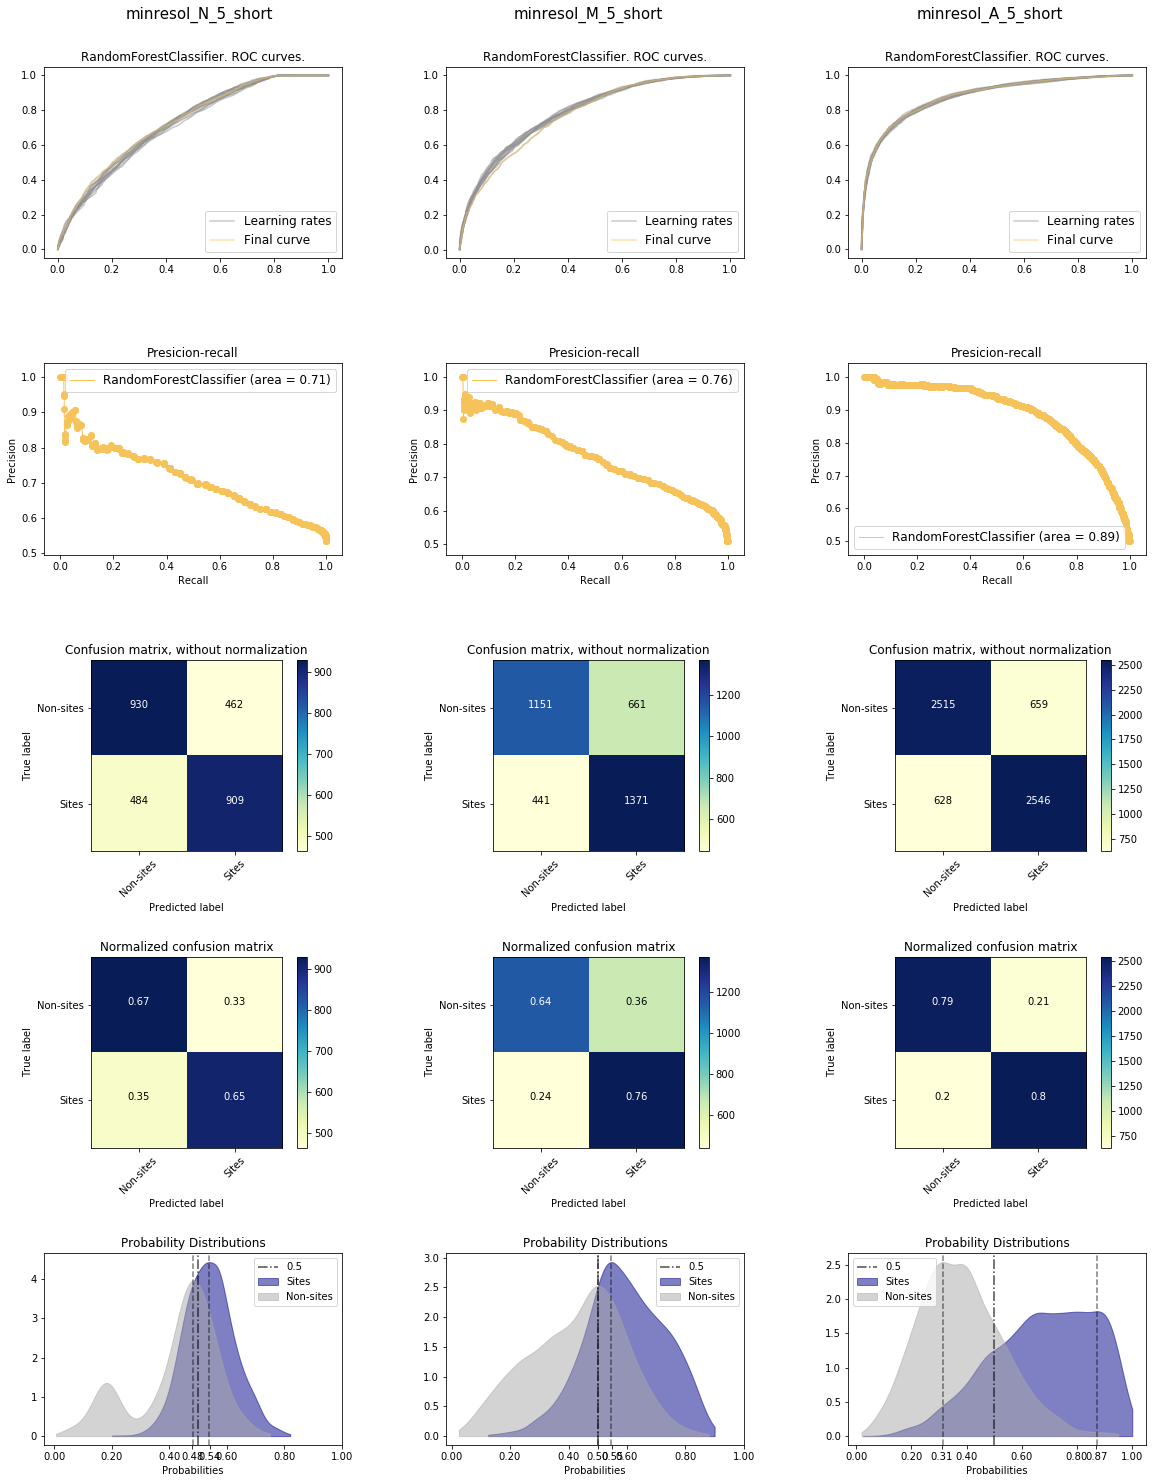

In [22]:
from matplotlib.backends.backend_pdf import PdfPages

pdf_pages = PdfPages('outputs/Comparisons/N_5,M_5,A_5, shorts.pdf')

plots_N_5 = data_N_5['plots']
plots_M_5 = data_M_5['plots']
plots_A_5 = data_A_5['plots']

fig = plt.figure(figsize=(18,22)) 

plt.figtext(.22,0.98,'minresol_N_5_short', fontsize=15, ha='center')
plt.figtext(.52,0.98,'minresol_M_5_short', fontsize=15, ha='center')
plt.figtext(.83,0.98,'minresol_A_5_short', fontsize=15, ha='center')
all_plots = ['roc_auc', 'prec_recall', 'cnf', 'cnf_normed', 'prob_density']
for i,plot in enumerate(all_plots):
    ax = fig.add_subplot(5,3,i*3+1)
    [eval(plot_string) for plot_string in plots_N_5[plot] if plots_N_5[plot] != []]
    ax = fig.add_subplot(5,3,i*3+2)
    [eval(plot_string) for plot_string in plots_M_5[plot] if plots_M_5[plot] != []]
    ax = fig.add_subplot(5,3,i*3+3)
    [eval(plot_string) for plot_string in plots_A_5[plot] if plots_A_5[plot] != []]
    
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace = 0.55, wspace=0.35)    
pdf_pages.savefig()
pdf_pages.close()